## Preprocessing

In [136]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [137]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [138]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [139]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [140]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [141]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [142]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [143]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 1883].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [144]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [145]:
import pandas as pd

# Define bin edges
bins = [0, 5000, 7742, 50000, 1000000, 10000000000]

# Define bin labels
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Apply binning to the ASK_AMT column
application_df['ASK_AMT_Binned'] = pd.cut(application_df['ASK_AMT'], bins=bins, labels=labels)

# Drop the original ASK_AMT column if needed
application_df.drop(columns='ASK_AMT', inplace=True)


In [151]:
# Convert categorical data to numeric with `pd.get_dummies`
numerical_app_df = pd.get_dummies(application_df)
#dropped columns based on relative importance
numerical_app_df.drop(columns=['AFFILIATION_Family/Parent', 'AFFILIATION_National', 'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y', 'AFFILIATION_Regional', 'STATUS', 'AFFILIATION_Other', 'USE_CASE_Other'], inplace=True)
numerical_app_df

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_Binned_Very Low,ASK_AMT_Binned_Low,ASK_AMT_Binned_Moderate,ASK_AMT_Binned_High,ASK_AMT_Binned_Very High
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34295,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34296,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34297,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


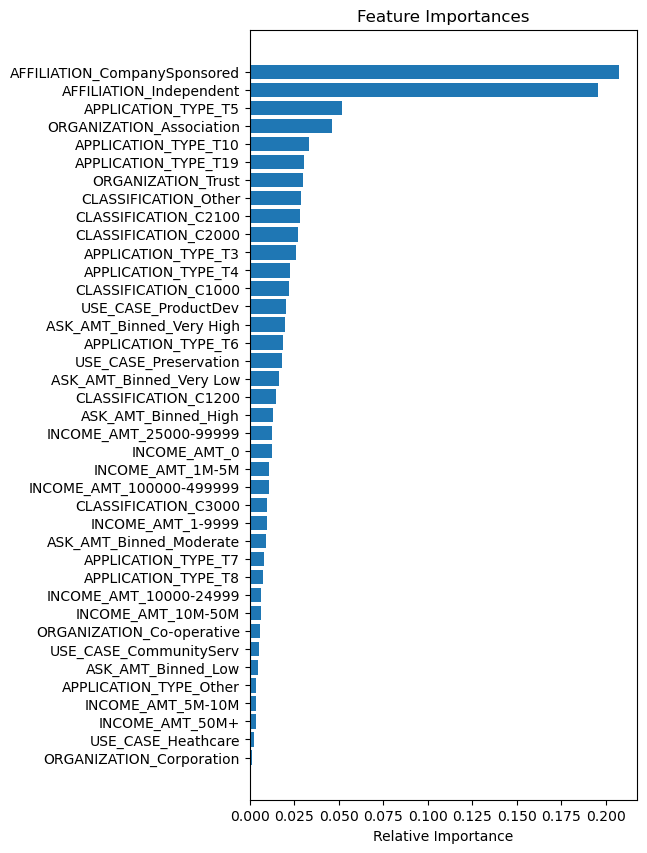

In [152]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

y = numerical_app_df['IS_SUCCESSFUL'].values
X = numerical_app_df.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Get the feature names from the dataframe
feature_names = numerical_app_df.drop(columns='IS_SUCCESSFUL').columns

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Train the model with X_train and y_train

# Get feature importances
importances = model.feature_importances_

# Sort indices of features by importance
indices = importances.argsort()

# Plot feature importances
plt.figure(figsize=(5,10))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names[indices])  # Label the y-axis with feature names
plt.xlabel("Relative Importance")
plt.show()

In [158]:
numerical_app_df.columns

Index(['IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Independent', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'ASK_AMT_Binned_Very Low',
       'ASK_AMT_Binned_Low', 'ASK_AMT_Bin

In [153]:
# Split our preprocessed data into our features and target arrays
y = numerical_app_df['IS_SUCCESSFUL'].values
X = numerical_app_df.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [155]:
input_dim = X_train_scaled.shape[1]  

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create the Neural Network
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=39, input_dim=input_dim, activation='tanh'))

# Add more hidden layers... as much as you want...
nn.add(tf.keras.layers.Dense(units=100, activation='relu'))
nn.add(tf.keras.layers.Dense(units=100, activation='relu'))
nn.add(tf.keras.layers.Dense(units=100, activation='tanh'))
nn.add(tf.keras.layers.Dense(units=100, activation='relu'))

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

nn.compile(
    loss = 'binary_crossentropy', # This loss function is needed for Binary label prediction
    optimizer='adam', # The algorith for gradient descent
    metrics=['accuracy'] # The metrics to improve the model
)

nn.fit(X_train_scaled, y_train, epochs=100)
nn.evaluate(X_test_scaled, y_test)

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5672 - accuracy: 0.7222
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5557 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5514 - accuracy: 0.7322
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5492 - accuracy: 0.7339
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5478 - accuracy: 0.7338
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5461 - accuracy: 0.7345
Epoch 7/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5453 - accuracy: 0.7362
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5445 - accuracy: 0.7352
Epoch 9/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5437 - accuracy: 0.7358
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5423 - accura

[0.5927528738975525, 0.728863000869751]

## Compile, Train and Evaluate the Model

In [156]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5928 - accuracy: 0.7289 - 770ms/epoch - 3ms/step
Loss: 0.5927528738975525, Accuracy: 0.728863000869751


In [157]:
# Export our model to HDF5 file
nn.save('./models/alphabetSoupCharity_Optimization4.h5')